In [1]:
import tensorflow as tf

In [2]:
%load_ext tensorboard

In [3]:
!rm -rf ./logs/

In [4]:
from google.colab import files
files.upload()

Saving birth_life_2010.txt to birth_life_2010.txt


{'birth_life_2010.txt': b'Country\tBirth rate\tLife expectancy\nVietnam\t1.822\t74.828243902\nVanuatu\t3.869\t70.819487805\nTonga\t3.911\t72.150658537\nTimor-Leste\t5.578\t61.999853659\nThailand\t1.579\t73.927658537\nSolomon Islands\t4.229\t67.465195122\nSingapore\t1.15\t81.641463415\nSamoa\t3.86\t72.306390244\nPhilippines\t3.142\t68.484317073\nPapua New Guinea\t3.951\t62.440609756\nNew Zealand\t2.16\t80.702439024\nNew Caledonia\t2.141\t76.301682927\nMyanmar\t2.002\t64.662097561\nMongolia\t2.504\t68.194975610\nMicronesia\t3.451\t68.764829268\nMalaysia\t2.635\t74.024560976\nMacao SAR, China\t1.092\t80.775317073\nLao PDR\t2.747\t67.064\nKorea\t1.22\t80.761951220\nJapan\t1.39\t82.932682927\nIndonesia\t2.117\t68.889658537\nHong Kong SAR, China\t1.108\t82.878048780\nGuam\t2.47\t75.994268293\nFrench Polynesia\t2.09\t75.076878049\nFiji\t2.668\t69.225829268\nDem. Rep. Korea\t2.022\t68.532146341\nChina\t1.598\t73.273097561\nCambodia\t2.581\t62.536219512\nBrunei\t2.042\t77.932024390\nAustralia\t

In [5]:
import numpy as np
def read_birth_life_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:]
    data = [line[:-1].split('\t') for line in text]
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    return data, n_samples

In [6]:
data, n_samples = read_birth_life_data("birth_life_2010.txt")
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))
w = tf.Variable(0.0)
b = tf.Variable(0.0)
def prediction(x):
  return x * w + b
def squared_loss(y, y_predicted):
  return (y - y_predicted) ** 2
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [7]:
EPOCHS = 100
for epoch in range(EPOCHS):
  total_loss = 0.0
  for x, y in dataset:
    with tf.GradientTape() as tape:
      l = squared_loss(y, prediction(x))
      total_loss += l
    gradients = tape.gradient(l, [w,b])
    optimizer.apply_gradients(zip(gradients, [w,b]))
  print('Epoch {0}: {1}'.format(epoch, total_loss / n_samples))
print(f'w:{w.numpy()} b:{b.numpy()}')


Epoch 0: 1661.8631591796875
Epoch 1: 956.3222045898438
Epoch 2: 844.6739501953125
Epoch 3: 750.7313232421875
Epoch 4: 667.6598510742188
Epoch 5: 594.1416625976562
Epoch 6: 529.0786743164062
Epoch 7: 471.5003662109375
Epoch 8: 420.5458068847656
Epoch 9: 375.4551696777344
Epoch 10: 335.5544128417969
Epoch 11: 300.2461853027344
Epoch 12: 269.0038146972656
Epoch 13: 241.3595733642578
Epoch 14: 216.90037536621094
Epoch 15: 195.2597198486328
Epoch 16: 176.1138153076172
Epoch 17: 159.1754913330078
Epoch 18: 144.19065856933594
Epoch 19: 130.93504333496094
Epoch 20: 119.20935821533203
Epoch 21: 108.83794403076172
Epoch 22: 99.66456604003906
Epoch 23: 91.55170440673828
Epoch 24: 84.37657928466797
Epoch 25: 78.0321273803711
Epoch 26: 72.42179107666016
Epoch 27: 67.46131134033203
Epoch 28: 63.07561111450195
Epoch 29: 59.19870376586914
Epoch 30: 55.7716178894043
Epoch 31: 52.74269485473633
Epoch 32: 50.065635681152344
Epoch 33: 47.70006561279297
Epoch 34: 45.610172271728516
Epoch 35: 43.76379394531

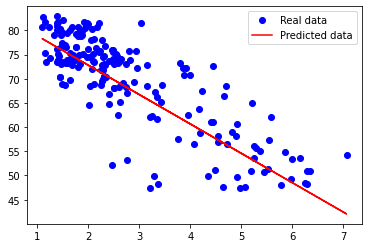

In [8]:
import matplotlib.pyplot as plt
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()